# Tree Based Models

There are various tree based models also known as decision tree.

## 1. ID3* Algorithm
1. Select "the best feature" to split(we will see how to select)
2. Separate the training samples according to the selected feature
3. Stop if we have samples from a single class or if used all features and note it as a leaf node.

<b>Top down Approach:</b> Grow the tree from root node to leaf nodes

*ID3 (Iterative Dichotomiser 3)

In [5]:
# Decision trees Numerical Example

import pandas as pd
import numpy as np

x1 = np.random.randn(10)
x2 = np.random.randn(10)
df = pd.DataFrame(x2,x1, dtype=None)
df

,0
0.514392,0.457474
0.544412,0.667078
1.336535,-0.804584
0.209320,0.542769
0.462749,-0.561175
2.150836,0.261588
-1.303327,-1.345101
-1.130344,-1.390377
-0.728173,0.296434
-0.217851,-1.015621


# Decison Trees in sklearn

## DecisionTreeClassifier: sklearn Decision Tree classifier(there is also a regressor version) -
.fit(), .predict()

DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, max_samples_leaf=1, class_weight=None)

# Ensemble Learning

<b>Ensemble</b> methods create a strong model by combining the predictions of multiple weak models (aka weak learners or base estimators) built with a given dataset and a given learning algorithm.
Data -> Weak Model 1, Weak Model 2, Weak Model N -> Ensemble Prediction

We will understand <b>Bagging and Boosting</b> ensemble models as well.

## Bagging (Bootstrap Aggregating)

Bagging  (Bootstrap Aggregating) method:

. Randomly draw N samples of a fix size from the training set (with replacement) - bootstrap technique
. Build independent estimators of same type on each subset.
. Majority vote or average the predictions from all estimators.

Bagging Decision Trees : <b>Random Forest</b>

## Random Forest in sklearn

RandomForestClassifier : sklearn RandomForestClassifier (there is also a regressor version) - .fit(), .predict()

RandomForestClassifier(n_estimatore=100, max_samples=None, criterion='gini', max_depth=None)

## Bagging in sklearn

BaggingClassifier: sklearn very general interface for bagging which can be provided anybase_estimator - fit(), .predict()

BaggingClassifier(base_estimator=None, n_estimators=10, max_samples=1.0, bootstrap=True)

# Hyperparameter Tuning

Hyperparameters are ML algorithms parameters that affect the structure of the algorithms and the performnace of the models.

Examples of hyperparameters

. KNearestNeighbors: n_neighbors, metric
. DecisionTrees : max_depth, min_samples_leaf, class_weight, criterion
. RandomForest : n_estimators, max_samples
. EnsembleBagging: base_estimator, n_estimators

Hyperparameter tuning looks for the best combination of hyperparameters (combination that maximizes model performance)


## Grid Search in sklearn

<b>GridSearchCV</b> : sklearn basic hyperparamter tuning method, finds the optimum combination of hyperparamters by exhaustive search over specified paramter values - .fit(), .predict()

GridSearchCV(estimator, param_grid, scoring=None)

Example : Hyperparamters for a decision tree:
param_grid= {max_depth:[5,10,50,100,250],min_samples_leaf:[15,20,25,30,35]}
Total hyperparameters combinations 5x5=25
[5,15],[5,20],[5,25],[5,30],[5,35],......

Note - GridSearchCV takes longer time to tune the hyperparamters and is not that easy to scale.

## Randomized Search in sklearn

<b>RandomizedSearchCV</b> randomized search on hyperparameters.
. Chooses a fixed number(given by parameter n_iter) of random combinations of hyperparameter values and only tries those.
. Can sample from distributions (sampling with replacement is used), if at least one parameter is given as a distribution.

RandomizedSearchCV(estimator, param_distributions, n_iter=10, scoring=None)

Example: Hyperparameters for a decison tree:
param_grid={max_depth:[5,10,50,100,250], min_samples_leaf:uniform(15,35,5)}

Note - RandomizedSearchCV has a chance of tuning to the better model in lesser amount of time

## Bayesian Search

. Bayesian search method keeps track of the previous  hyperparameter evaluations and builds a probabilistic model.
. It tries to balance exploration(uncertain hyperparamter set) and exploitation (hyperparameters with a good chance of being optimum)
. It prefers points near the ones that worked well.
. <b>AWS SageMaker</b> uses Bayesian search for hyperparameter optimization.

## Transformers in sklearn

. SimpleImputer, StandardScaler, MinMaxScaler, LabelEncoder, OrdinalEncoder, OneHotEncoder and CountVectorizer belong to sklearn's transformer class, all have

. .fit() method: learns the transformation from the training dataset.
. .transform() method: applies the transformation to any dataset (training, validation, test) for preprocessing
 On training set can also apply -> .fit_transform()


# 1. Read the dataset

In [11]:
import pandas as pd

df = pd.read_csv('review_dataset.csv')
df.shape

(95485, 13)

# 2. Explanatory data analysis

In [12]:
df.head()

,Pet ID,Outcome Type,Sex upon Outcome,Name,Found Location,Intake Type,Intake Condition,Pet Type,Sex upon Intake,Breed,Color,Age upon Intake Days,Age upon Outcome Days
0,A794011,1.0,Neutered Male,Chunk,Austin (TX),Owner Surrender,Normal,Cat,Neutered Male,Domestic Shorthair Mix,Brown Tabby/White,730,730
1,A776359,1.0,Neutered Male,Gizmo,7201 Levander Loop in Austin (TX),Stray,Normal,Dog,Intact Male,Chihuahua Shorthair Mix,White/Brown,365,365
2,A674754,0.0,Intact Male,NaN,12034 Research in Austin (TX),Stray,Nursing,Cat,Intact Male,Domestic Shorthair Mix,Orange Tabby,6,6
3,A689724,1.0,Neutered Male,*Donatello,2300 Waterway Bnd in Austin (TX),Stray,Normal,Cat,Intact Male,Domestic Shorthair Mix,Black,60,60
4,A680969,1.0,Neutered Male,*Zeus,4701 Staggerbrush Rd in Austin (TX),Stray,Nursing,Cat,Intact Male,Domestic Shorthair Mix,White/Orange Tabby,7,60


In [13]:
df.describe()

,Outcome Type,Age upon Intake Days,Age upon Outcome Days
count,95485.000000,95485.000000,95485.000000
mean,0.564005,703.436959,717.757313
std,0.495889,1052.252197,1055.023160
min,0.000000,0.000000,0.000000
25%,0.000000,30.000000,60.000000
50%,1.000000,365.000000,365.000000
75%,1.000000,730.000000,730.000000
max,1.000000,9125.000000,9125.000000


In [19]:
df.columns

Index(['Pet ID', 'Outcome Type', 'Sex upon Outcome', 'Name', 'Found Location',
       'Intake Type', 'Intake Condition', 'Pet Type', 'Sex upon Intake',
       'Breed', 'Color', 'Age upon Intake Days', 'Age upon Outcome Days'],
      dtype='object')

In [21]:
model_features = df.columns.drop('Outcome Type')
model_target = 'Outcome Type'
print('Model Features:',model_features)
print()
print('Model Target:',model_target)

Model Features: Index(['Pet ID', 'Sex upon Outcome', 'Name', 'Found Location', 'Intake Type',
       'Intake Condition', 'Pet Type', 'Sex upon Intake', 'Breed', 'Color',
       'Age upon Intake Days', 'Age upon Outcome Days'],
      dtype='object')

Model Target: Outcome Type


Lets explore it further by dividing these features into numerical and categorical data features

In [22]:
import numpy as np

numerical_features_all = df[model_features].select_dtypes(include=np.number).columns
categorical_features_all = df[model_features].select_dtypes(include='object').columns
print(numerical_features_all)
print()
print(categorical_features_all)

Index(['Age upon Intake Days', 'Age upon Outcome Days'], dtype='object')

Index(['Pet ID', 'Sex upon Outcome', 'Name', 'Found Location', 'Intake Type',
       'Intake Condition', 'Pet Type', 'Sex upon Intake', 'Breed', 'Color'],
      dtype='object')


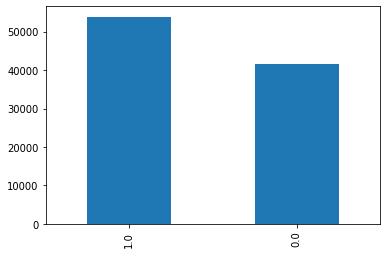

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

df[model_target].value_counts().plot.bar()
plt.show()

# 3. Select features to build the model

This time we will select all features. That is we will build a classifier including numerical, categorical and text features

In [30]:
# Grab model features/inputs and target/output
# can also grab less numerical features, as some numerical data might
# not be very useful
numerical_features = ['Age upon Intake Days', 'Age upon Outcome Days']
print(numerical_features)

['Age upon Intake Days', 'Age upon Outcome Days']


In [31]:
categorical_features=['Sex upon Outcome', 'Intake Type', 'Intake Condition',
                     'Pet Type', 'Sex upon Intake']
print(categorical_features)

['Sex upon Outcome', 'Intake Type', 'Intake Condition', 'Pet Type', 'Sex upon Intake']


In [34]:
text_features = ['Name', 'Found Location', 'Breed', 'Color']
print(text_features)

['Name', 'Found Location', 'Breed', 'Color']


In [35]:
model_features = numerical_features + categorical_features + text_features
model_target = 'Outcome Type'

Cleaning numerical features

Age upon Intake Days


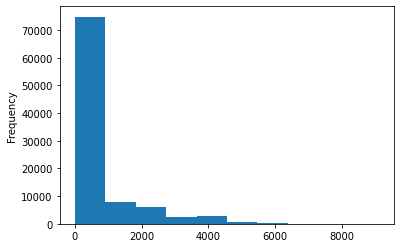

Age upon Outcome Days


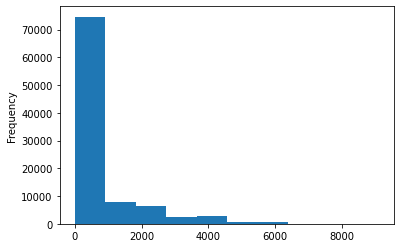

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

for c in numerical_features:
    print(c)
    df[c].plot.hist(bins=10)
    plt.show()

In [39]:
for c in numerical_features:
    print(c)
    print('min:', df[c].min(), 'max:', df[c].max())

Age upon Intake Days
min: 0 max: 9125
Age upon Outcome Days
min: 0 max: 9125


with value_counts() function we can increase the number of histogram bins to 10 for more bins for a more refined view of the numerical features.

In [42]:
for c in numerical_features:
    print(c)
    print(df[c].value_counts(bins=10, sort=False))
    plt.show()

Age upon Intake Days
(-9.126, 912.5]     74835
(912.5, 1825.0]     10647
(1825.0, 2737.5]     3471
(2737.5, 3650.0]     3998
(3650.0, 4562.5]     1234
(4562.5, 5475.0]     1031
(5475.0, 6387.5]      183
(6387.5, 7300.0]       79
(7300.0, 8212.5]        5
(8212.5, 9125.0]        2
Name: Age upon Intake Days, dtype: int64
Age upon Outcome Days
(-9.126, 912.5]     74642
(912.5, 1825.0]     10699
(1825.0, 2737.5]     3465
(2737.5, 3650.0]     4080
(3650.0, 4562.5]     1263
(4562.5, 5475.0]     1061
(5475.0, 6387.5]      187
(6387.5, 7300.0]       81
(7300.0, 8212.5]        5
(8212.5, 9125.0]        2
Name: Age upon Outcome Days, dtype: int64


In [43]:
print(df[numerical_features].isna().sum())

Age upon Intake Days     0
Age upon Outcome Days    0
dtype: int64


If any missing values then we can apply a mean imputation as a quick fix. This will replace the missing values with the mean value of the corresponding column.

Cleaning categorical features

Let's also examine the categorical features.

In [44]:
for c in categorical_features:
    print(c)
    print(df[c].unique()) # value_counts()

Sex upon Outcome
['Neutered Male' 'Intact Male' 'Intact Female' 'Unknown' 'Spayed Female'
 nan]
Intake Type
['Owner Surrender' 'Stray' 'Wildlife' 'Public Assist' 'Euthanasia Request'
 'Abandoned']
Intake Condition
['Normal' 'Nursing' 'Sick' 'Injured' 'Aged' 'Feral' 'Pregnant' 'Other'
 'Behavior' 'Medical']
Pet Type
['Cat' 'Dog' 'Other' 'Bird' 'Livestock']
Sex upon Intake
['Neutered Male' 'Intact Male' 'Intact Female' 'Unknown' 'Spayed Female'
 nan]


Applying the type conversion to both categoricals and text features, takes care of the nans in the text fields as well. In case other imputations are planned for the categoricals and/or text fields, notice that the masking shown above leaves the nans unchanged.

In [45]:
df[categorical_features + text_features] = df[categorical_features + text_features].astype('str')
print(df[categorical_features + text_features].isna().sum())

Sex upon Outcome    0
Intake Type         0
Intake Condition    0
Pet Type            0
Sex upon Intake     0
Name                0
Found Location      0
Breed               0
Color               0
dtype: int64


Cleaning text features

So we have cleaned the numerical_features, categorical_features and now lets clean the text features as well.

In [46]:
for c in text_features:
    print(c)
    print(df[c].unique())

Name
['Chunk' 'Gizmo' 'nan' ... '*Lingonberry' 'Guawp' '*Squanchy']
Found Location
['Austin (TX)' '7201 Levander Loop in Austin (TX)'
 '12034 Research in Austin (TX)' ... '4612 Sherwyn Drive in Austin (TX)'
 '16010 Voelker Ln in Austin (TX)' '2211 Santa Rita Street in Austin (TX)']
Breed
['Domestic Shorthair Mix' 'Chihuahua Shorthair Mix' 'Domestic Shorthair'
 ... 'Unknown' 'Bichon Frise/Lhasa Apso' 'Treeing Cur']
Color
['Brown Tabby/White' 'White/Brown' 'Orange Tabby' 'Black'
 'White/Orange Tabby' 'Blue/White' 'Brown Tabby' 'Gray' 'Calico'
 'Brown/Black' 'White/Tan' 'White' 'Brown' 'Black/White' 'Brown/White'
 'Black/Brown' 'Chocolate/White' 'Red' 'White/White' 'Brown Brindle/White'
 'Gray/Black' 'Tortie' 'Tan' 'White/Blue Tabby' 'Brown/Brown' 'Black/Gray'
 'Blue' 'Cream Tabby' 'Brown/Gray' 'Blue Tabby/White' 'Red/White'
 'Orange Tabby/White' 'Brown Merle/White' 'Tricolor' 'Apricot' 'Black/Tan'
 'Tortie Point' 'Tan/Black' 'Torbie/Brown Tabby' 'White/Black'
 'Blue Tabby' 'Blue Tick' 'W

In [47]:
# Prepare cleaning functions

import re, string
import nltk
from nltk.stem import SnowballStemmer

stop_words = ["a", "an", "the", "this", "that", "is", "it", "to",
             "and"]
stemmer = SnowballStemmer('english')

def preProcessText(text):
    # lowercase and strip
    text = text.lower().strip()
    # remove HTML tags
    text = re.compile('<.*?>').sub('', text)
    # remove punctuations
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    # remove extra white space
    text = re.sub('\s+', ' ', text)
    
    return text

def lexiconProcess(text, stop_words, stemmer):
    filtered_sentence=[]
    words = text.split(" ")
    for w in words:
        if w not in stop_words:
            filtered_sentence.append(stemmer.stem(w))
    text = " ".join(filtered_sentence)
    return text

def cleanSentence(text, stop_words, stemmer):
    return lexiconProcess(preProcessText(text), stop_words, stemmer)

for c in text_features:
    print('Text cleaning: ', c)
    df[c] = [cleanSentence(item, stop_words, stemmer) for item in df[c].values]


Text cleaning:  Name
Text cleaning:  Found Location
Text cleaning:  Breed
Text cleaning:  Color


The cleaned text features are ready to be vectorized after the train/test split.

# 4. Training and test datasets

In [48]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df, test_size=0.1, shuffle=
                                        True, random_state=23)

print('Training set shape: ', train_data.shape)
print('Class 0 samples in the training set: ', sum(train_data[model_target]==0))
print('Class 1 samples in the training set: ', sum(train_data[model_target]==1))
print()
print('Testing set shape: ', test_data.shape)
print('class 0 samples in the testing set: ', sum(test_data[model_target]==0))
print('class 1 samples in the testing set: ', sum(test_data[model_target]==1))


Training set shape:  (85936, 13)
Class 0 samples in the training set:  37499
Class 1 samples in the training set:  48437

Testing set shape:  (9549, 13)
class 0 samples in the testing set:  4132
class 1 samples in the testing set:  5417


As we can see there is an imbalance in class 0 and 1 samples in both training and testing set. But we will fix this only in training set. Coz the validation and test sets should follow the original distributions

In [49]:
from sklearn.utils import shuffle

class_0_no = train_data[train_data[model_target]==0]
class_1_no = train_data[train_data[model_target]==1]

unsampled_class_0_no = class_0_no.sample(n=len(class_1_no),
                                        replace=True, random_state=42)

train_data = pd.concat([class_1_no, unsampled_class_0_no])
train_data = shuffle(train_data)

print('Training set shape:', train_data.shape)
print('Class 0 samples in the training set: ', sum(train_data[model_target]==0))
print('Class 1 samples in the training set: ', sum(train_data[model_target]==1))


Training set shape: (96874, 13)
Class 0 samples in the training set:  48437
Class 1 samples in the training set:  48437


# 5. Data processing with pipeline and columnTransformer

Here we will be building a complex pipeline today. We will first build seperate pipelines to handle the numerical, categorical and text features and then combine them into a composite pipeline along with an estimator, a DecisionTreeClassifier here.

For the numerical features pipeline, the numerical_processor below, we impute missing values with the mean using sklearn's followed by a MinMaxScaler(we dont have to scale features when using DecisionTrees, but its a good idea to see how to use more feature data transforms). If different processing is desired for different numerical features, different pipelines should be built - just like shown below for the 2 text features.

In the categorical pipeline, the categorical_processor below we impute with a placeholder value(no effect here as we already encoded with the nans) and encode with sklearn's OneHotEncoder.
If computing memory is an issue, it is a good idea to check categoricals, unique values, to get an estimate of many dummy featueres. Note the handle_unknown parameter that tells the encoder to ignore(rather than throw an error for) any unique values that might show in the validation/and or test set that was not present in the initial training set.

And finally, also with memory usage in mind, we build 2 more pipelines, one for each of our text features, trying different vocabulary sizes.

The selective preparations of the dataset features are then put together into a collective ColumnTransformer, to be finally used in a pipeline aling with an estimator. This ensures that the transforms are performed automatically on the raw data when fitting the model and when making predictions, such as when evaluating the model on a validation dataset via cross-validation or making predictions on a test dataset in the future.


In [52]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

########################
## Column Transformer ##
########################

# Preprocess the numerical features

numerical_processor = Pipeline([
    ('num_imputer', SimpleImputer(strategy='mean')),
    ('num_scaler', MinMaxScaler()) # shown in case if needed, not a must in case of DecisionTrees
])

# Preprocess the categorical features

categorical_processor = Pipeline([
    #('cat_imputer', SimpleImputer(strategy='constant', fill_value='missing'))
    ('cat_encoder', OneHotEncoder(handle_unknown='ignore'))
])
# handle_unknown tells it to ignore any value that was not present
# in the initial training set

# Preprocess the text features

# Preprocess 1st text feature
text_processor_0 = Pipeline([
    ('text_vect_0', CountVectorizer(binary=True, max_features=150))
])

# Preprocess 2nd text feature (larger vocabulary)
text_processor_1 = Pipeline([
    ('text_vect_1', CountVectorizer(binary=True, max_features=150))
])

# Combine all data preprocessors from above
# For each processor/step spcify a name, the actual process, and
# finally the features to be processed

data_preprocessor = ColumnTransformer([
    ('numerical_pre', numerical_processor, numerical_features),
    ('categorical_pre', categorical_processor, categorical_features),
    ('text_pre_0', text_processor_0, text_features[0]),
    ('text_pre_1', text_processor_1, text_features[1])
])

###############
### PIPELINE ##
###############

# Pipeline desired all data transformers, along with an estimator
# at the end
# Later we can set/reach the parameters using the names issued
# for hyperparameter tuning, for ex

pipeline = Pipeline([
    ('data_preprocessing', data_preprocessor),
    ('dt', DecisionTreeClassifier())
])

from sklearn import set_config
set_config(display='diagram')
pipeline

Pipeline(steps=[('data_preprocessing',
                 ColumnTransformer(transformers=[('numerical_pre',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('num_scaler',
                                                                   MinMaxScaler())]),
                                                  ['Age upon Intake Days',
                                                   'Age upon Outcome Days']),
                                                 ('categorical_pre',
                                                  Pipeline(steps=[('cat_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Sex upon Outcome',
                                                   'Intake Type',
                                                   'Intake Condition',
                                                   'Pet Type',
                                                   'Sex upon Intake']),
                                                 ('text_pre_0',
                                                  Pipeline(steps=[('text_vect_0',
                                                                   CountVectorizer(binary=True,
                                                                                   max_features=150))]),
                                                  'Name'),
                                                 ('text_pre_1',
                                                  Pipeline(steps=[('text_vect_1',
                                                                   CountVectorizer(binary=True,
                                                                                   max_features=150))]),
                                                  'Found Location')])),
                ('dt', DecisionTreeClassifier())])

# 6. Train and tune a classifier

Lets first train and test the above composite pipeline on the train and test sets

In [54]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

X_train = train_data[model_features]
y_train = train_data[model_target]

# Fit the pipeline to training data
pipeline.fit(X_train, y_train)

# Use the fitted pipeline to make predictions on the train dataset

train_predictions = pipeline.predict(X_train)
print('confusion matrix: ', confusion_matrix(y_train, train_predictions))
print('classification report: ', classification_report(y_train, train_predictions))
print('accuracy(train): ', accuracy_score(y_train, train_predictions))

# Get test data
X_test = test_data[model_features]
y_test = test_data[model_target]

# Use the fitted pipeline to make predictions on the test dataset

test_predictions = pipeline.predict(X_test)
print()
print('confusion matrix: ', confusion_matrix(y_test, test_predictions))
print('classification report: ', classification_report(y_test, test_predictions))
print('accuracy(test): ', accuracy_score(y_test, test_predictions))



confusion matrix:  [[46178  2259]
 [ 1788 46649]]
classification report:                precision    recall  f1-score   support

         0.0       0.96      0.95      0.96     48437
         1.0       0.95      0.96      0.96     48437

    accuracy                           0.96     96874
   macro avg       0.96      0.96      0.96     96874
weighted avg       0.96      0.96      0.96     96874

accuracy(train):  0.9582240848937795

confusion matrix:  [[3180  952]
 [ 892 4525]]
classification report:                precision    recall  f1-score   support

         0.0       0.78      0.77      0.78      4132
         1.0       0.83      0.84      0.83      5417

    accuracy                           0.81      9549
   macro avg       0.80      0.80      0.80      9549
weighted avg       0.81      0.81      0.81      9549

accuracy(test):  0.8068907739030265


## Hyperparameter Tuning

We will now use sklearn's GridSearchCV to look for hyperparamter combinations to improve the accuracy on the test set(and reduce the generalization gap) As GridSearchCV does cross-validation train-validation split internally, our data transformers inside the pieline context will force the correct behavior of learning data transformations on the training set, and applying the transformations on the validation set when cross-validatiing, as well on the test set later when running test predictions.
Also, pipeline's step names give easy access to hyperparameters for hyperparameter tuning while cross-validating. Parameters of the estimators in the pipeline can be accessed using the estimator parameter syntax. Note the double underscores connecting the estimator and parameters__!

In [55]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

##########################
## PIPELINE GRID_SEARCH ##
##########################

# Parameter grid for GridSearch

param_grid = {'dt__max_depth':[100,200,300],
             'dt__min_samples_leaf':[5,10,15],
             'dt__min_samples_split':[2,5,15]}
grid_search = GridSearchCV(pipeline, # Base Model
                          param_grid, # Parameters to try
                          cv=5, # Apply 5-fold cross validation
                          verbose=1, # Print summary
                          n_jobs=-1, # Use all available processors
                          )
# Fit the gridSearch to our training set
grid_search.fit(X_train, y_train)
                           

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:  7.2min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('data_preprocessing',
                                        ColumnTransformer(transformers=[('numerical_pre',
                                                                         Pipeline(steps=[('num_imputer',
                                                                                          SimpleImputer()),
                                                                                         ('num_scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['Age '
                                                                          'upon '
                                                                          'Intake '
                                                                          'Days',
                                                                          'Age '
                                                                          'upon '
                                                                          'Outcome '
                                                                          'Days']),
                                                                        ('categorical_pre',
                                                                         Pipeline(steps=[('cat_encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Sex '
                                                                          '...
                                                                         Pipeline(steps=[('text_vect_0',
                                                                                          CountVectorizer(binary=True,
                                                                                                          max_features=150))]),
                                                                         'Name'),
                                                                        ('text_pre_1',
                                                                         Pipeline(steps=[('text_vect_1',
                                                                                          CountVectorizer(binary=True,
                                                                                                          max_features=150))]),
                                                                         'Found '
                                                                         'Location')])),
                                       ('dt', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'dt__max_depth': [100, 200, 300],
                         'dt__min_samples_leaf': [5, 10, 15],
                         'dt__min_samples_split': [2, 5, 15]},
             verbose=1)

In [57]:
print(grid_search.best_params_)
print(grid_search.best_score_)

# Get the best model out of GridSearchCV

classifier = grid_search.best_estimator_

# Fit the best model to the train data once more
classifier.fit(X_train, y_train)

{'dt__max_depth': 100, 'dt__min_samples_leaf': 15, 'dt__min_samples_split': 2}
0.8402048095052563


Pipeline(steps=[('data_preprocessing',
                 ColumnTransformer(transformers=[('numerical_pre',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('num_scaler',
                                                                   MinMaxScaler())]),
                                                  ['Age upon Intake Days',
                                                   'Age upon Outcome Days']),
                                                 ('categorical_pre',
                                                  Pipeline(steps=[('cat_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Sex upon Outcome',
                                                   'Intake Type',
                                                   'Intake Condition',
                                                   'Pet Type',
                                                   'Sex upon Intake']),
                                                 ('text_pre_0',
                                                  Pipeline(steps=[('text_vect_0',
                                                                   CountVectorizer(binary=True,
                                                                                   max_features=150))]),
                                                  'Name'),
                                                 ('text_pre_1',
                                                  Pipeline(steps=[('text_vect_1',
                                                                   CountVectorizer(binary=True,
                                                                                   max_features=150))]),
                                                  'Found Location')])),
                ('dt',
                 DecisionTreeClassifier(max_depth=100, min_samples_leaf=15))])

# 7. Test the classifier

Now we test the best model with the best parameters on 'unseen' data(our test data)

Before that lest see how the model works on the training dataset.



In [58]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

train_predictions = classifier.predict(X_train)
print('Model performance on the train set:')
print('Accuracy score: ', accuracy_score(y_train, train_predictions))


Model performance on the train set:
Accuracy score:  0.8554410884241386


And now lets evaluate the performance of the classifier on the test set

In [60]:
from sklearn.metrics import accuracy_score

test_predictions = classifier.predict(X_test)
print('Model performance on the test set:')
print('Accuracy score: ', accuracy_score(y_test, test_predictions))

Model performance on the test set:
Accuracy score:  0.8444863336475024


# 8. Train a classifier with SageMaker build-in algorithm

<b>Fitting the classifier</b>

We will call the SageMaker LinearLearner() below

. Compute power : We will use train_instance_count and train_instance_type parameters. This example uses ml.m4.xlarge resource for training. We can change the instance type for our needs(For example GPUs for nueral networks)
. Model type : predictor_type is set to binary_classifier, as we have a binary classification problem here, multiclass_classifier could be used if there are 3 or more classes involved or 'regressor' for a regression problem.


In [62]:
import sagemaker

# Call the LinearLearner estimator object

LL_estimator = sagemaker.LinearLearner(
role = sagemaker.get_execution_role(),
train_instance_count=1,
train_instance_type='ml.m4.xlarge',
predictor_type='binary_classifier'
)

ValueError: Must setup local AWS configuration with a region supported by SageMaker.